In [1]:
import strongholds

import numpy as np

import matplotlib.pyplot as plt

default_rng = np.random.default_rng(0)

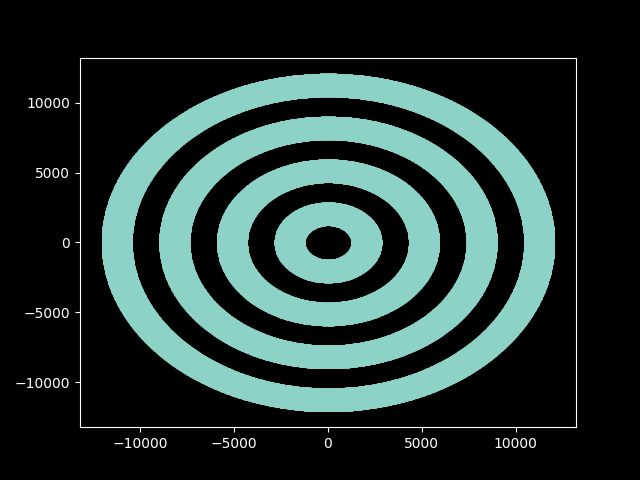

In [2]:
%matplotlib widget

fig, ax = plt.subplots()

grid = strongholds.generation_grid(ring_nums=range(4))

ax.scatter(grid.real, grid.imag, s=0.2)

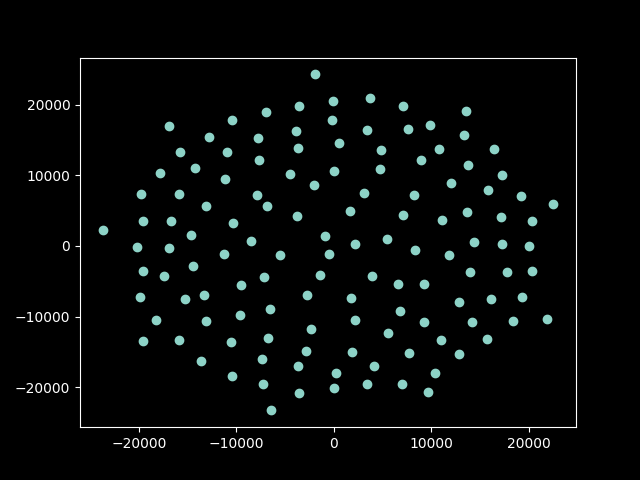

In [3]:
fig2, ax2 = plt.subplots()
example_world = strongholds.generate_all()
ax2.scatter(example_world.real, example_world.imag)

In [4]:
player = strongholds.rectpoint(3000, -300)

all_strongholds = strongholds.generate_all()

target = strongholds.closest_stronghold(player, all_strongholds)
target

array(1496.+1080.j)

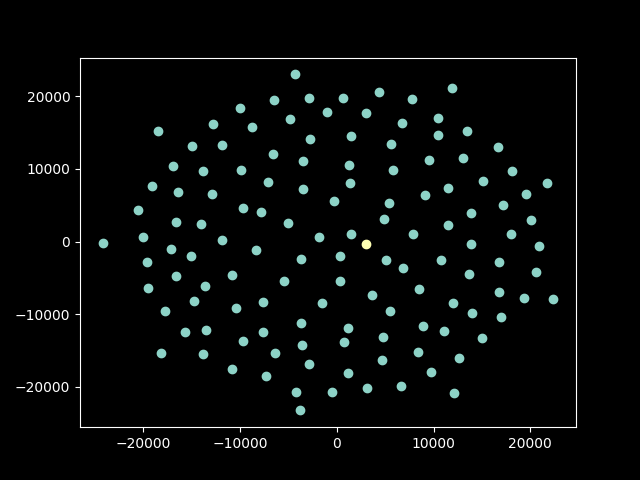

In [5]:
fig3, ax3 = plt.subplots()
ax3.scatter(all_strongholds.real, all_strongholds.imag)
ax3.scatter(player.real, player.imag)

In [6]:
throw_angle = strongholds.math.angle(target - player)
throw_angle

2.3991638640128095

In [7]:
grid = strongholds.generation_grid(range(2))
possible_targets = strongholds.points_in_cone(player, grid, throw_angle, 1e-4, error_is_relative=False)
possible_targets

array([ 1688. +904.j,  1496.+1080.j,  1304.+1256.j,  1112.+1432.j,
         328.+2152.j,   136.+2328.j,   -56.+2504.j,  -248.+2680.j,
       -1800.+4104.j, -1992.+4280.j, -2008.+4296.j, -2184.+4456.j,
       -2200.+4472.j, -2376.+4632.j, -2392.+4648.j, -2568.+4808.j,
       -2584.+4824.j, -2776.+5000.j])

In [8]:
ring_map = strongholds.generation_heatmap(1*10**5, range(4), default_rng)

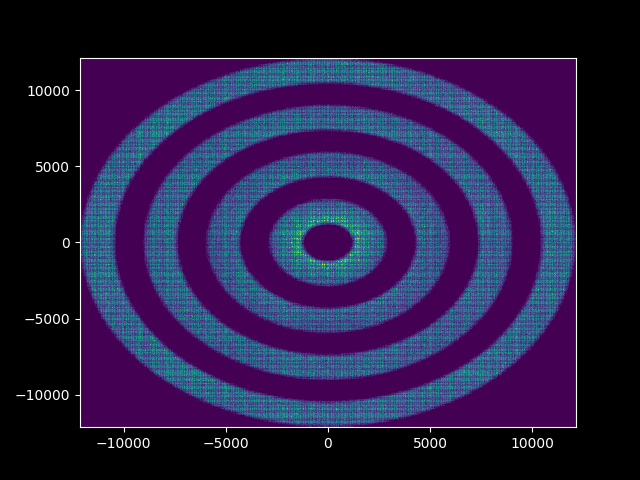

In [9]:
fig4, ax4 = plt.subplots()

ring_hist2d = ax4.hist2d(ring_map.real, ring_map.imag, bins=600)

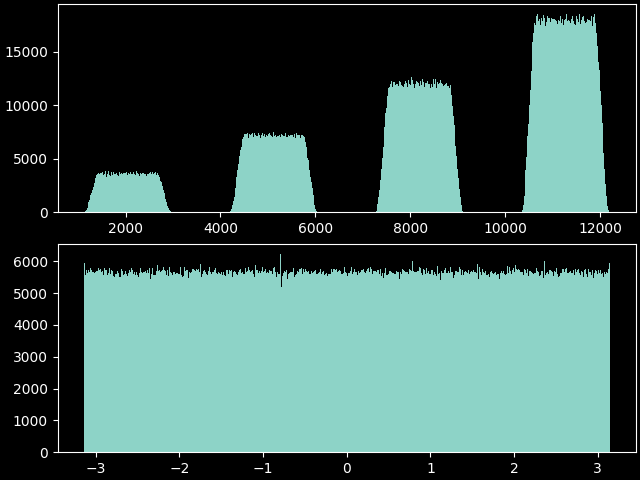

In [10]:
fig5, ax5 = plt.subplots(2, 1, constrained_layout=True)

ring_r, ring_phi = np.abs(ring_map), np.angle(ring_map)

ring_r_hist = ax5[0].hist(ring_r, bins=600)
ring_phi_hist = ax5[1].hist(ring_phi, bins=600)